In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import folium
import numpy as np

In [3]:
df = pd.read_csv('p2-arbres-fr.csv', delimiter=';')
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

(200137, 18)

In [6]:
duplicated_rows = df.duplicated()
if df[duplicated_rows].shape[0] == 0:
    print("Il n'y a pas de lignes en doublon")
else:
    print("Il y a des lignes en doubon")


Il n'y a pas de lignes en doublon


In [7]:
column = 'geo_point_2d_b'
missing_values = df[column].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne {column} :", missing_values)

Nombre de valeurs manquantes dans la colonne geo_point_2d_b : 0


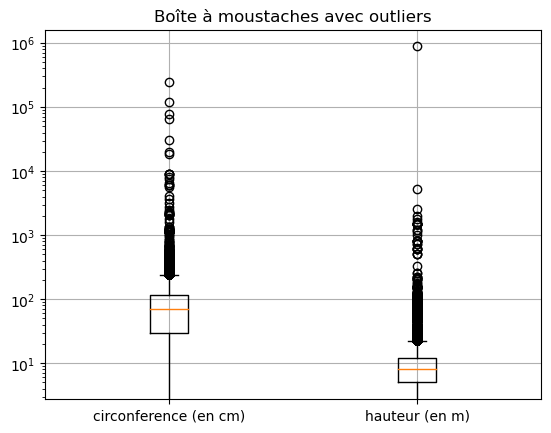

In [5]:
circonference = df['circonference_cm']
hauteur = df['hauteur_m']
plt.boxplot([circonference, hauteur], showfliers=True) 
plt.xticks([1, 2], ['circonference (en cm)', 'hauteur (en m)'])
plt.yscale('log')
plt.title("Boîte à moustaches avec outliers")
plt.grid(True)
plt.show()

In [4]:
hauteur_reccord = 31
circonference_reccord = 700

df_sans_outlier_hauteur = df.loc[df.hauteur_m <= hauteur_reccord, :]
df_sans_outlier = df_sans_outlier_hauteur.loc[df_sans_outlier_hauteur.circonference_cm <= circonference_reccord, :]
df_sans_outlier.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


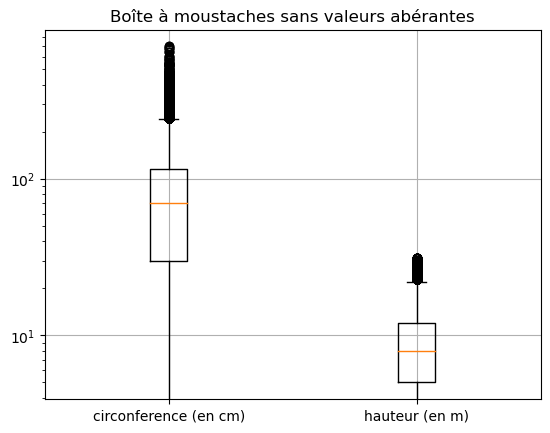

In [55]:
circonference = df_sans_outlier['circonference_cm']
hauteur = df_sans_outlier['hauteur_m']
plt.boxplot([circonference, hauteur], showfliers=True) 
plt.xticks([1, 2], ['circonference (en cm)', 'hauteur (en m)'])
plt.yscale('log')
plt.title("Boîte à moustaches sans valeurs abérantes")
plt.grid(True)
plt.show()

In [33]:
df.isna().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [11]:
df.groupby('stade_developpement')['circonference_cm'].max()

stade_developpement
A     250255
J       9035
JA      7540
M       2439
Name: circonference_cm, dtype: int64

In [32]:
print(round(df['circonference_cm'].max()/(100*2*np.pi)*2),'mètres de diamètre')

797 mètres de diamètre


In [3]:
df['libelle_francais'].value_counts()

libelle_francais
Platane       42508
Marronnier    25207
Tilleul       21305
Erable        18389
Sophora       11797
              ...  
Cordyline         1
Camphrier         1
Jujubier          1
Maackie           1
Garrya            1
Name: count, Length: 192, dtype: int64

In [19]:
print(round((1-df['stade_developpement'].dropna().shape[0]/df['stade_developpement'].shape[0])*100,1)
      ,'% de valeurs manquantes dans "stade_developpement"')

33.6 % de valeurs manquantes dans "stade_developpement"


Il y a beaucoup de valeurs manquantes dans cette colonne, elle va être difficilement exploitable. Il faut soit établir une stratégie d'imputation pour compléter les valeurs manquantes, soit abandonner cette colonne.

In [54]:
remarquable_per_genre_df = df_sans_outlier.groupby(['genre'])['remarquable'].sum().sort_values(ascending=False)
remarquable_per_genre_df = remarquable_per_genre_df[remarquable_per_genre_df>1]
temp_serie = df_sans_outlier[df_sans_outlier['genre'].isin(remarquable_per_genre_df[remarquable_per_genre_df > 0].index)]\
.genre.value_counts().sort_values()
print('Classé par arbre les 10 genres d\'arbres les plus plantés dans Paris')

pd.DataFrame(remarquable_per_genre_df.div(temp_serie)*100, columns = ['%'],\
             index=temp_serie.sort_values(ascending=False).index)

Classé par arbre les 10 genres d'arbres les plus plantés dans Paris


,%
genre,
Platanus,0.061282
Aesculus,0.039537
Acer,0.032531
Sophora,0.016933
Pinus,0.082406
Celtis,0.048792
Quercus,0.257865
Corylus,0.202488
Ulmus,0.140713


In [5]:
df_platanus = df_sans_outlier.loc[df_sans_outlier.genre == 'Platanus',:]
df_platanus.groupby('stade_developpement')['hauteur_m'].max()

stade_developpement
A     31
J     25
JA    28
M     31
Name: hauteur_m, dtype: int64

In [20]:
def attribuer_stade_arbre(espece, taille, circonference):
    if espece == 'Platanus':
        if taille <= 10:
            return 'J'
        elif 10 < taille <= 20:
            return 'JA'
        elif 20 < taille <= 25:
            return 'A'
        else:
            return 'M'
    elif espece == 'Aesculus':
        if taille <= 10 and circonference <= 100:
            return 'J'
        elif 10 < taille <= 20 and 60 < circonference <= 200:
            return 'JA'
        elif 15 < taille <= 35 and 100 < circonference <= 400:
            return 'A'
        else:
            return 'M'
    elif espece == 'Acer' or espece == 'Sophora':
        if taille <= 8 and circonference <= 30:
            return 'J'
        elif 8 < taille <= 15 and 30 < circonference <= 100:
            return 'JA'
        elif 15 < taille <= 25 and 100 < circonference <= 200:
            return 'A'
        else:
            return 'M'
    elif espece == 'Pinus':
        if taille <= 5 and circonference <= 15:
            return 'J'
        elif 5 < taille <= 15 and 15 < circonference <= 30:
            return 'JA'
        elif 15 < taille <= 45 and 30 < circonference <= 100:
            return 'A'
        else:
            return 'M'
   

In [21]:
df['stade_developpement'] = df.apply(lambda row: attribuer_stade_arbre(row['genre'], row['hauteur_m'], row['circonference_cm']), axis=1)

df.head(40)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,J,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,None,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,None,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,M,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,None,NaN,48.890435,2.315289
5,99879,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0036,Arbre à miel,Tetradium,daniellii,NaN,38,0,None,NaN,48.890470,2.315228
6,99880,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0035,Arbre à miel,Tetradium,daniellii,NaN,37,0,None,NaN,48.890504,2.315168
7,99881,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,35,Platane,Platanus,x hispanica,NaN,260,17,JA,NaN,48.876722,2.280222
8,99882,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802008,Sophora,Sophora,japonica,NaN,145,14,M,0.0,48.871990,2.275814
9,99883,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,802009,Sophora,Sophora,japonica,NaN,135,10,M,0.0,48.872046,2.275752
